#  Investigation on factors associated with violent crime numbers and predictive model for total number of violent crime 

**Group member:&nbsp;&nbsp; Emily Ahn &nbsp; &nbsp; Xiaoran Fan &nbsp; &nbsp; Vicky Lin &nbsp; &nbsp; Chunyu Zhang**      

## Introduction

Nowadays, crime has become a severe problem around the world and is increasing in our society, making people feel anxious and unsafe all the time. Research showed many young people from US and Canadian colleges expressed being fearful of crime on and off campus (Leah E Daigle et al, 2021), which arises people’s thinking on the factors related to committing a crime. According to National Research Council (2008), factors such as the state of economic opportunity, demographic groups and etc. may have a relationship with crime. Therefore, we decided to use the Communities and Crime Data Set acquired from UCI Machine Learning Repository by Michael Redmond to examine both the inference and predictive question: **For one specific state in US, California, among the factors of population density, young age rate, urbanization, income, poverty, education, unemployment, divorce rate and the number of people in a family, which ones are associated with a total crime number, and what variables can build up the best model to predict the total crime number?**
 
 
Our data set includes real data from socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR. This dataset contains a total number of 128 attributes and 1994 instances. In our study, we will focus on one specific state in US, California, therefore we will use 278 instances of the data (which are instances of California). Also, we will not use all of the variables in the dataset but chose 11 variables we are interested to study (10 explanatory variables and 1 response variable). In this study, our focus is both inference and predictive, and we will use the linear regression model to study both of them.

## Preliminary Results

In [1]:
library(tidyverse)
library(repr)
library(readxl)
library(infer)
library(cowplot)
library(GGally)
library(broom)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.1
✔ readr   2.1.2     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


ERROR: Error in library(cowplot): there is no package called ‘cowplot’


### Load Data

We first read the `communities.data` in data file and named it `crime_data`. 

In [2]:
set.seed(4)
crime_data <- read_csv("data/communities.data", col_names = FALSE)

head(crime_data)

Rows: 1994 Columns: 128
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (26): X2, X3, X4, X31, X102, X103, X104, X105, X106, X107, X108, X109, ...
dbl (102): X1, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,⋯,X119,X120,X121,X122,X123,X124,X125,X126,X127,X128
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>
8,?,?,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,⋯,0.12,0.26,0.20,0.06,0.04,0.9,0.5,0.32,0.14,0.20
53,?,?,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,⋯,0.02,0.12,0.45,?,?,?,?,0.00,?,0.67
24,?,?,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,⋯,0.01,0.21,0.02,?,?,?,?,0.00,?,0.43
34,5,81440,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,⋯,0.02,0.39,0.28,?,?,?,?,0.00,?,0.12
42,95,6096,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,⋯,0.04,0.09,0.02,?,?,?,?,0.00,?,0.03
6,?,?,SouthPasadenacity,1,0.02,0.28,0.06,0.54,1.00,⋯,0.01,0.58,0.10,?,?,?,?,0.00,?,0.14


### Clean and Wrangle Data

We find that, in some of the variables, not all of the values are completely collected, so we select the variables with no missed data.

Then we add the descripitions of each data we selected according to the `communities.names` file as follow:

- X1 -- `state`: US state (by number) - not counted as predictive above, but if considered, should be consided nominal (nominal)

- X6 -- `popComm`: population for community: (numeric - decimal)

- X14 -- `agePct16t24`: percentage of population that is 16-24 in age (numeric - decimal)

- X17 -- `pctUrban`: percentage of people living in areas classified as urban (numeric - decimal)<br>
      (In this variable, we are interested in whether or not there is people living in areas classified as urban, so we decide to change the datatype of this variable to categorical variable. We decide to classify the data with a percentage of 0 as `non-urban`, which means that *no one lives in an urban area*, and we classified the data with a percentage larger than 0 as `urban`, which means that *there are people living in cities*.)

- X26 -- `perCapInc`: per capita income (numeric - decimal)

- X34 -- `pctUnderPov`: percentage of people under the poverty level (numeric - decimal)

- X36 -- `pctNotHSGrad`: percentage of people 25 and over that are not high school graduates (numeric - decimal)

- X38 -- `pctUnemployed`: percentage of people 16 and over, in the labor force, and unemployed (numeric - decimal)

- X47 -- `pctDiv`: percentage of population who are divorced (numeric - decimal)

- X48 -- `meanPerFam`: mean number of people per family (numeric - decimal)

- X128 -- `totCrimesPerPop`: total number of violent crimes per 100K popuation (numeric - decimal) GOAL attribute (to be predicted)

We call the new dataset `crime` and print the first and last 6 rows in the `crime`.

We also count the total number of row in `crime`. (and assume it as the population of our research)?

In [3]:
crime <- crime_data %>%
  select(X1,X6,X14,X17,X26,X34,X36,X38,X47,X48,X128)%>%
  rename(state = X1,
         popComm = X6,
         agePct16t24 = X14,
         pctUrban = X17,
         perCapInc = X26,
         pctUnderPov = X34,
         pctNotHSGrad = X36,
         pctUnemployed = X38,
         pctDiv = X47,
         meanPerFam = X48,
         totCrimesPerPop = X128)
crime$pctUrban <- if_else(crime$pctUrban > 0,
                 "urban","non-urban")
crime <- crime%>%
  mutate(pctUrban = as_factor(pctUrban))

head(crime)
tail(crime)
nrow(crime)

state,popComm,agePct16t24,pctUrban,perCapInc,pctUnderPov,pctNotHSGrad,pctUnemployed,pctDiv,meanPerFam,totCrimesPerPop
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8,0.19,0.29,urban,0.40,0.19,0.18,0.27,0.75,0.35,0.20
53,0.00,0.35,urban,0.37,0.24,0.24,0.27,1.00,0.29,0.67
24,0.00,0.28,non-urban,0.27,0.27,0.43,0.36,0.70,0.45,0.43
34,0.04,0.34,urban,0.36,0.10,0.25,0.33,0.44,0.75,0.12
42,0.01,0.23,urban,0.43,0.06,0.30,0.12,0.21,0.51,0.03
6,0.02,0.27,urban,0.72,0.12,0.12,0.10,0.58,0.44,0.14


state,popComm,agePct16t24,pctUrban,perCapInc,pctUnderPov,pctNotHSGrad,pctUnemployed,pctDiv,meanPerFam,totCrimesPerPop
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,0.02,0.43,non-urban,0.17,0.76,0.62,0.61,0.64,0.53,0.19
12,0.01,0.35,urban,0.49,0.16,0.11,0.12,0.53,0.35,0.09
6,0.05,0.73,urban,0.18,0.32,0.37,0.24,0.48,0.71,0.45
9,0.16,0.31,urban,0.31,0.31,0.58,0.50,0.52,0.47,0.23
25,0.08,0.63,urban,0.40,0.16,0.35,0.37,0.32,0.46,0.19
6,0.20,0.40,urban,0.24,0.35,0.55,0.47,0.57,0.86,0.48


[1] 1994

We want to do the study based on one specific state rather than all of the states. Also, we want the state has enough instances for us to study, therefore, we chose the state with the most instances.

In [4]:
state_crime <- crime %>%
group_by(state)%>%
count()
max = max(state_crime$n)
state_crime[which(state_crime['n'] == max),]

state,n
<dbl>,<int>
6,278


As shown above, the state with area code 6, which is California (the name of corresponding state was not shown in the original data source but we searched it online), has the most instances. We `filter` out the instances of California and call the new dataset `clean_crime`. We will do our study based on `clean_crime`.

In [5]:
clean_crime <- crime %>%
filter(state == 6)
head(clean_crime)

state,popComm,agePct16t24,pctUrban,perCapInc,pctUnderPov,pctNotHSGrad,pctUnemployed,pctDiv,meanPerFam,totCrimesPerPop
<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
6,0.02,0.27,urban,0.72,0.12,0.12,0.10,0.58,0.44,0.14
6,0.01,0.36,non-urban,0.10,0.64,0.82,1.00,0.52,0.78,0.55
6,0.13,0.35,urban,0.33,0.18,0.36,0.32,0.46,0.85,0.24
6,0.04,0.30,urban,0.79,0.18,0.14,0.19,0.66,0.35,0.21
6,0.25,0.28,urban,0.29,0.34,0.43,0.59,0.67,0.60,0.34
6,0.02,0.39,non-urban,0.08,0.63,1.00,1.00,0.33,1.00,0.31


### View Data Visually

We first want to have a look at the distribution of the response variable `totCrimesPerPop`. We use `geom_histogram` to plot the distribution.

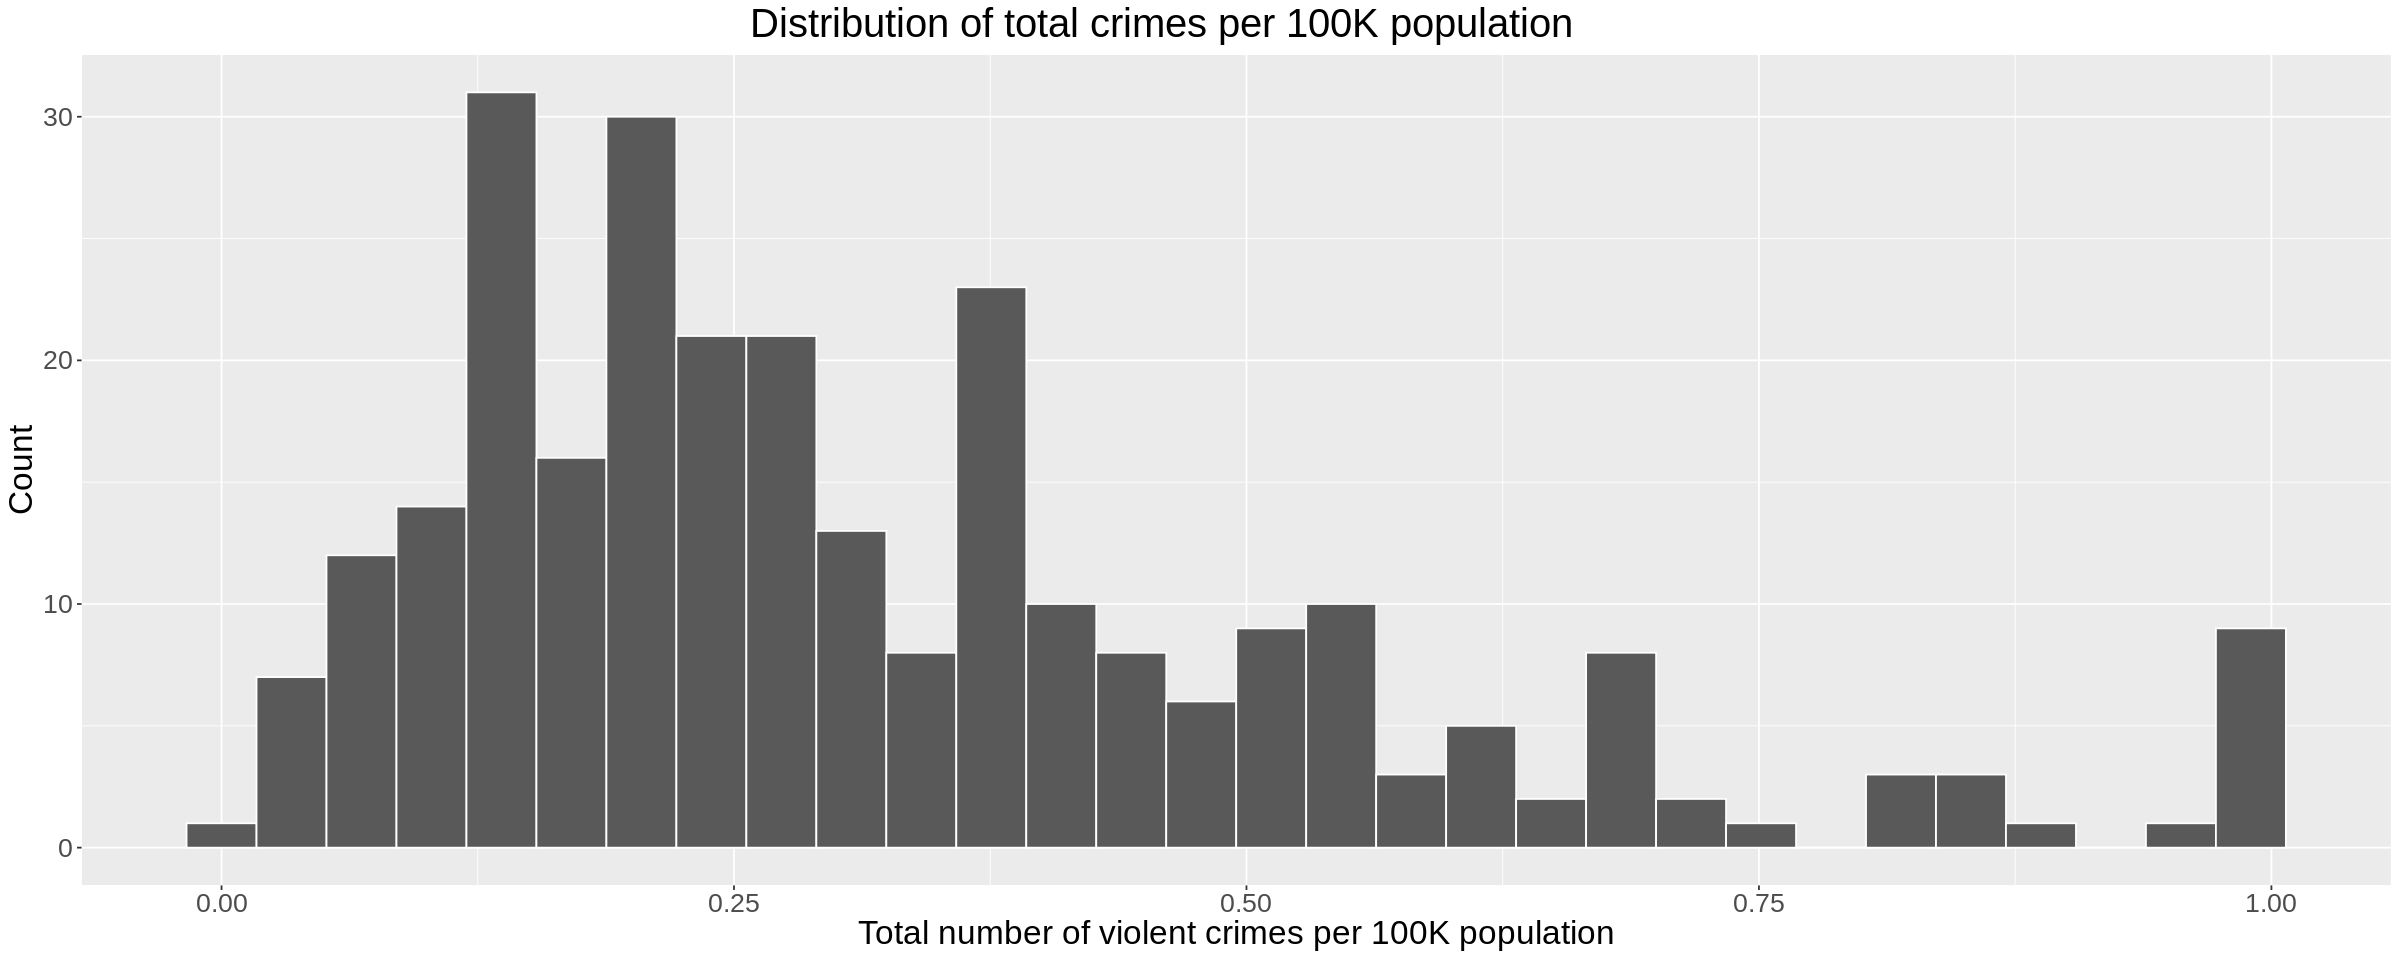

In [6]:
options(repr.plot.width = 20, repr.plot.height = 8)

tot_crime_dist <- clean_crime %>%
    ggplot(aes(x = totCrimesPerPop)) +
    geom_histogram(bins = 30, color = "white") +
    xlab("Total number of violent crimes per 100K population") +
    ylab("Count") +
    ggtitle("Distribution of total crimes per 100K population") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.45))
tot_crime_dist

Then, we want to see if there's any association between the quantitative input variables. Thus, we eliminated categorical variables `state` and `pctUrban` and call this dataset `continuous_var`.

In [7]:
continuous_var <- clean_crime%>%
  select(-state, -pctUrban)
head(continuous_var)

popComm,agePct16t24,perCapInc,pctUnderPov,pctNotHSGrad,pctUnemployed,pctDiv,meanPerFam,totCrimesPerPop
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.02,0.27,0.72,0.12,0.12,0.10,0.58,0.44,0.14
0.01,0.36,0.10,0.64,0.82,1.00,0.52,0.78,0.55
0.13,0.35,0.33,0.18,0.36,0.32,0.46,0.85,0.24
0.04,0.30,0.79,0.18,0.14,0.19,0.66,0.35,0.21
0.25,0.28,0.29,0.34,0.43,0.59,0.67,0.60,0.34
0.02,0.39,0.08,0.63,1.00,1.00,0.33,1.00,0.31


Now we explore (visually) the association between variables in the dataset. We use the plotting function `ggpairs()`, from the library `GGally`, to generate a pair plot of ALL the variables found in `continuous_var`. The `ggplot()` object’s name is `crime_pair_plots`.

In [8]:
crime_pair_plots <- continuous_var %>%
    ggpairs(progress = FALSE) +
  theme(
    text = element_text(size = 10),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold")
)
crime_pair_plots

ERROR: Error in ggpairs(., progress = FALSE): could not find function "ggpairs"


We also want to see the relationship between `pctUrban` and `totCrimesPerPop`. We use `geom_boxplot()` to visualize their relationship.

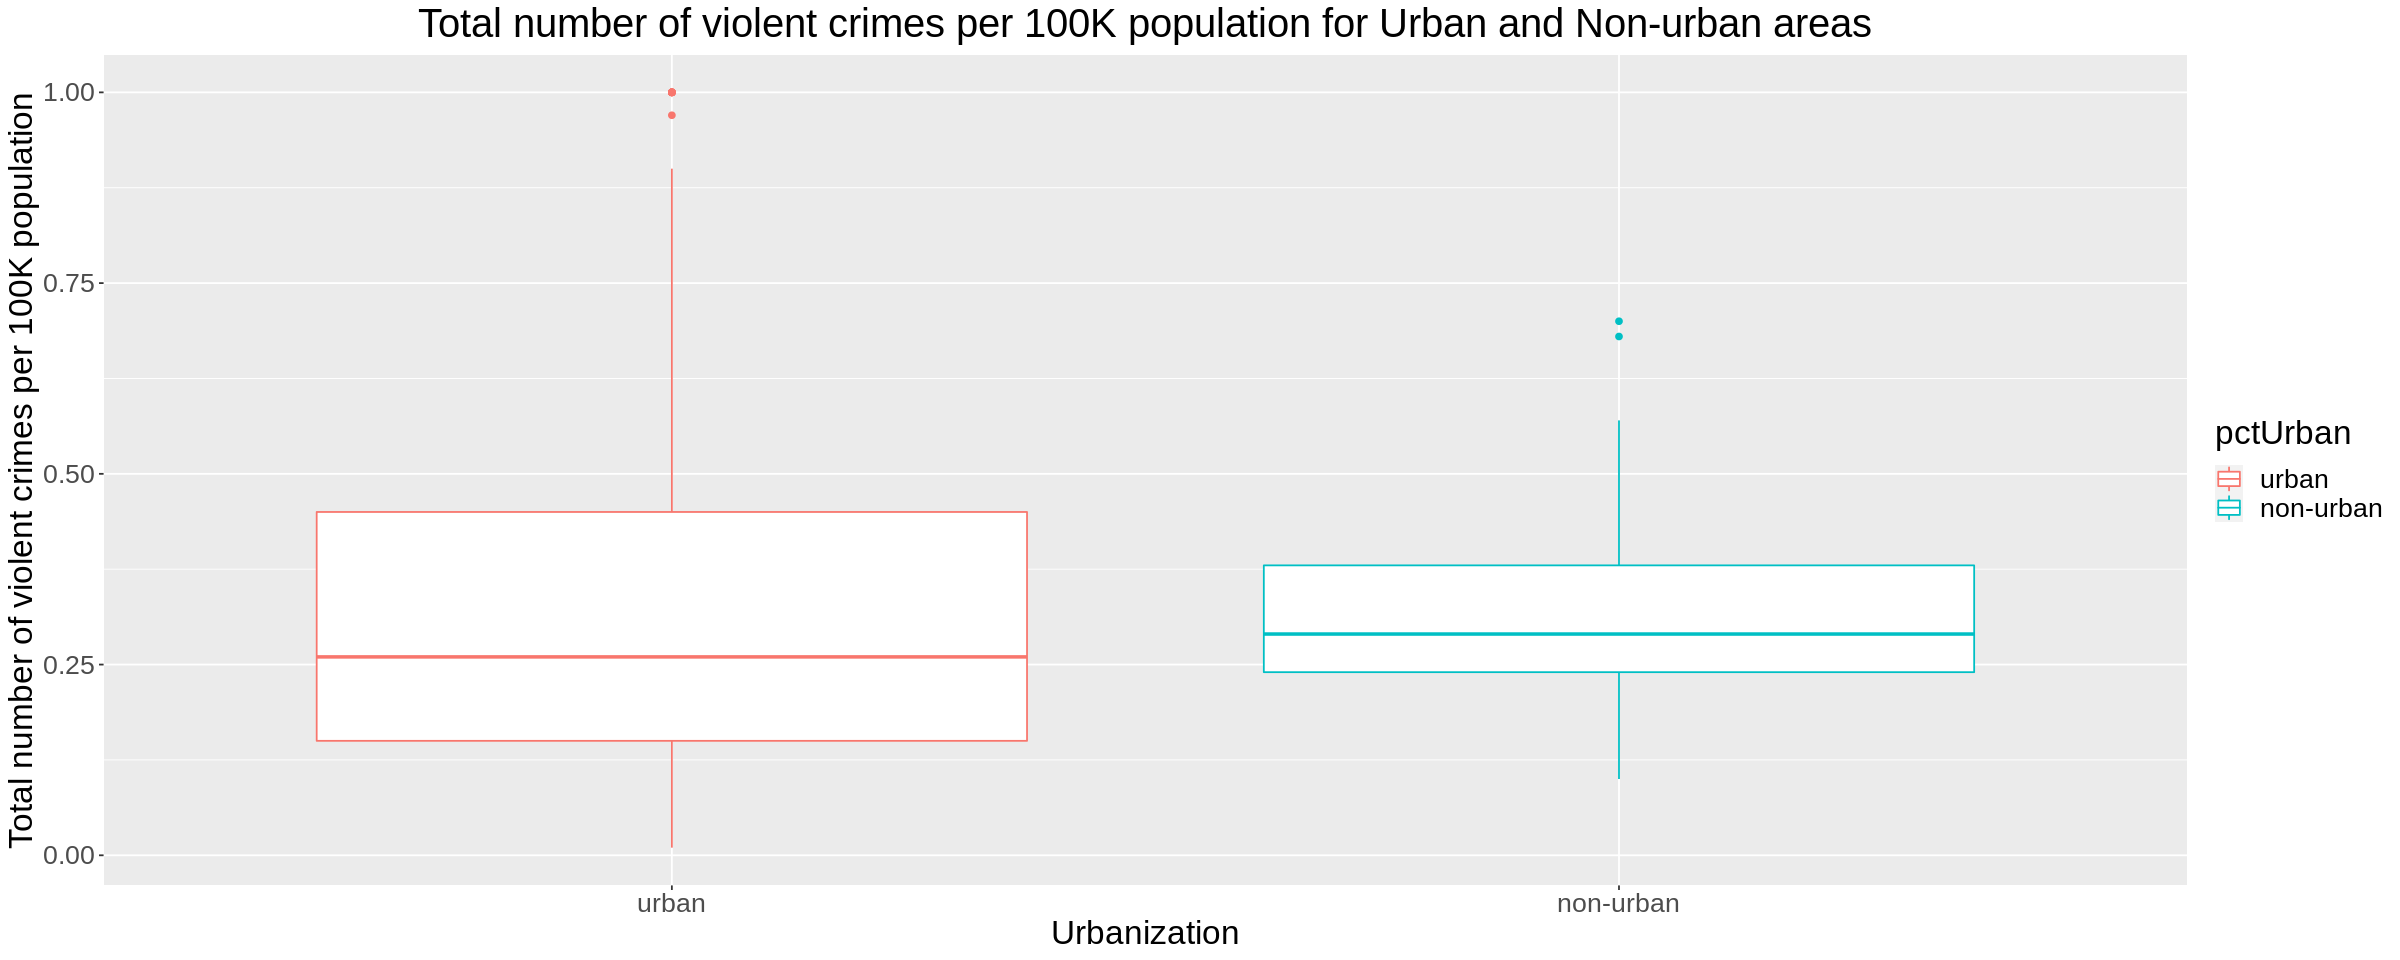

In [9]:
options(repr.plot.width = 20, repr.plot.height = 8)

urban_totCrime_boxplot <- 
    clean_crime %>%
    ggplot(aes(x = pctUrban, y = totCrimesPerPop , color = pctUrban)) +
    geom_boxplot() +
    xlab("Urbanization") +
    ylab("Total number of violent crimes per 100K population") +
    ggtitle("Total number of violent crimes per 100K population for Urban and Non-urban areas") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

urban_totCrime_boxplot

### Statistics of Data

Next, we want to summarize the statistics of all of the continuous variables in our dataset and we call this summary table `crime_summary`.

In [10]:
crime_summary <-
    clean_crime %>%
    select(-pctUrban, -state) %>%
    pivot_longer(cols = everything()) %>%
    group_by(name) %>% 
    summarise(
    mean = mean(value,na.rm = T),
    sd = sd(value,na.rm = T),
    median = median(value, na.rm = T),
    variance = var(value, na.rm = T),
    max = max(value, na.rm = T),
    min = min(value, na.rm = T))

crime_summary

name,mean,sd,median,variance,max,min
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
agePct16t24,0.33406475,0.1373223,0.310,0.01885743,1.00,0.09
meanPerFam,0.59312950,0.2219651,0.575,0.04926851,1.00,0.08
pctDiv,0.55500000,0.1502267,0.550,0.02256805,0.92,0.08
pctNotHSGrad,0.37967626,0.2516220,0.335,0.06331361,1.00,0.02
pctUnderPov,0.27661871,0.1807827,0.230,0.03268239,0.86,0.02
pctUnemployed,0.38611511,0.2341064,0.330,0.05480579,1.00,0.02
perCapInc,0.40586331,0.2344757,0.350,0.05497885,1.00,0.02
popComm,0.08992806,0.1442471,0.050,0.02080722,1.00,0.00
totCrimesPerPop,0.33046763,0.2261883,0.265,0.05116115,1.00,0.01


## Methods: Plan

**Trustworthiness:**
- The Community and Crime Data Set we retrieved is from socio-economic data from the 1990 US Census, law enforcement data from the 1990 US LEMAS survey, and crime data from the 1995 FBI UCR
- The Community and Crime Data Set is authentic and unbiased, as it recorded a number of factors related to violent crime, which is a reliable data source
- We will use scientific methods of statistical inference and statistical modelling in the study to obtain accurate results and do data analysis
 
 
**What methods do you plan on using?**
- We plan to apply generative modelling using linear regression model for inference study along with checking model assumptions, model selection and model evaluation
- We plan to apply predictive modelling using linear regression model for predictive study along with checking model assumptions, model selection and model evaluation
- For checking model assumptions, we will check heteroscedasticity using residual-fitted-value plot; check normality of error terms using Q-Q plots; check multicollinearity using VIF
- For model selection, we will use backward selection for inference study and forward selection for predictive study
- (For model evaluation, we will generate data and use adjusted R^2 to evaluate generative models and RMSE to evaluate predictive models; we will use F-test to compare models with different size)
 
**What do you expect to achieve?**
- We expect to see at least 5 factors among the 10 exploratory variables are associated with the response variable
- … (we need more)
 
**What impacts could your results have?**
- Through the inference study of factors associated with number of violent crime, the government may take corresponding measures to decrease the violent crime rate
- Using the predictive model, the government can predict the number of violent crime in specific areas based on related factors and then determine police operating budget for different areas
- Future related crime studies can use this study as an reference


## Reference

**References**

Daigle, Leah E.; Hancock, Katelyn; Chafin, Travis C.; Azimi, Andia. (2021). U.S. and Canadian College Students’ Fear of Crime: A Comparative Investigation of Fear of Crime and Its Correlates. Journal of Interpersonal Violence 37(15-16). https://doi.org/10.1177/08862605211001477 

 
National Research Council. (2008). Understanding Crime Trends: Workshop Report. Washington, DC: The National Academies Press. https://doi.org/10.17226/12472 

**Reference for Dataset**
 
Michael Redmond. (2009). Communities and Crime Data Set. UCI Machine Learning Repository Irvine, CA: the University of California, School of Information and Computer Science. https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
